In [21]:
from pearce.emulator.trainingData import make_training_data
from pearce.emulator.trainingHelper import load_training_params, calc_training_points

In [22]:
command = make_training_data('/u/ki/swmclau2/Git/pearce/bin/training_config.cfg')


In [23]:
hod_params, bins,obs, cosmo_params, dirname, job_id = load_training_params(command[-1])

In [24]:
cosmo_params

{'Lbox': 400.0,
 'n_repops': 10.0,
 'npart': 2048.0,
 'scale_factor': 0.658,
 'simname': 'chinchilla'}

In [25]:
cosmo_params['n_repops'] = 100

In [26]:
obs_val, obs_cov = calc_training_points(hod_params, bins,obs, cosmo_params, dirname, job_id)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


In [27]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [28]:
obs_err = np.sqrt(np.diag(obs_cov)*np.sqrt(cosmo_params['n_repops']))
rpoints = (bins[1:]+bins[:-1])/2

In [29]:
print obs_err

[  2.29436815e+01   4.58114023e+00   2.69528217e+00   1.10999106e+00
   5.89981995e-01   2.77136955e-01   1.40467840e-01   4.81280162e-02
   2.51659168e-02   1.39718673e-02   8.46755028e-03   5.46650177e-03
   3.43538571e-03   2.45395480e-03   1.78897272e-03   1.12302247e-03
   6.92346725e-04]


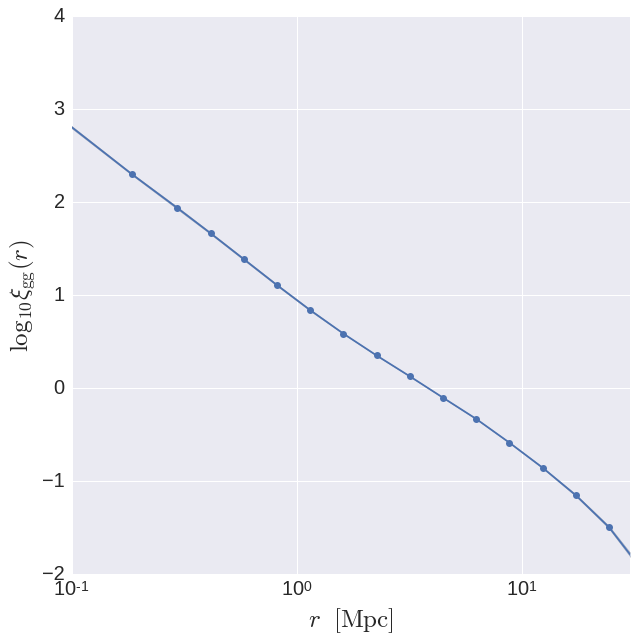

In [30]:
fig = plt.figure(figsize = (10, 10))

plt.plot(rpoints, np.log10(obs_val),'-o')

plt.fill_between(rpoints,np.log10(obs_val+obs_err),
                 np.log10(obs_val-obs_err),alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = -2, ymax = 4)
#plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{\xi_{\rm gg}(r) }$', fontsize=25)
#plt.legend(loc='best', fontsize=25)